# **Dataset Information**

## ***Data Cleaning and Preprocessing:***

In [29]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Load the dataset
file_path = 'StressLevelDataset (2).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display basic statistical details
print(data.describe())


   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

### 1. Handle Missing Data

In [30]:

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If there are any missing values, fill them with the median value of the respective column
data = data.fillna(data.median())

# Verify that there are no more missing values
missing_values_after = data.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values in each column:
 anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64
Missing values after imputation:
 anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sle

### 2. Detect and Address Outliers

In [31]:
# Using Z-score to detect outliers
z_scores = np.abs(stats.zscore(data))
outliers = (z_scores > 3).any(axis=1)
data_no_outliers = data[~outliers]

print(f"Number of outliers removed: {outliers.sum()}")

Number of outliers removed: 0


### 3. Feature Engineering

In [32]:


# Here we might apply transformations or create new features if necessary
# For now, let's scale the features using Min-Max scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_no_outliers), columns=data_no_outliers.columns)

# Display the first few rows of the cleaned and preprocessed data
print(data_scaled.head())

# Save the cleaned data to a new CSV file
cleaned_file_path = 'StressLevelDataset.csv'
data_scaled.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")


   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0       0.666667     0.666667                    0.0    0.407407       0.4   
1       0.714286     0.266667                    1.0    0.555556       1.0   
2       0.571429     0.600000                    1.0    0.518519       0.4   
3       0.761905     0.400000                    1.0    0.555556       0.8   
4       0.761905     0.933333                    0.0    0.259259       0.4   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0             0.0            0.4                0.8          0.4   
1             1.0            0.2                0.8          0.6   
2             0.0            0.4                0.4          0.4   
3             1.0            0.2                0.6          0.8   
4             1.0            1.0                0.2          0.6   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                0.6  ...          0.4        

## ***Exploratory Data Analysis (EDA):***

### 1. Statistical Analysis

In [33]:

# Calculate basic statistical measures
stats = data.describe().transpose()
print("Statistical Analysis:\n", stats)



Statistical Analysis:
                                count       mean       std  min   25%   50%  \
anxiety_level                 1100.0  11.063636  6.117558  0.0   6.0  11.0   
self_esteem                   1100.0  17.777273  8.944599  0.0  11.0  19.0   
mental_health_history         1100.0   0.492727  0.500175  0.0   0.0   0.0   
depression                    1100.0  12.555455  7.727008  0.0   6.0  12.0   
headache                      1100.0   2.508182  1.409356  0.0   1.0   3.0   
blood_pressure                1100.0   2.181818  0.833575  1.0   1.0   2.0   
sleep_quality                 1100.0   2.660000  1.548383  0.0   1.0   2.5   
breathing_problem             1100.0   2.753636  1.400713  0.0   2.0   3.0   
noise_level                   1100.0   2.649091  1.328127  0.0   2.0   3.0   
living_conditions             1100.0   2.518182  1.119208  0.0   2.0   2.0   
safety                        1100.0   2.737273  1.406171  0.0   2.0   2.0   
basic_needs                   1100.0   2.

### 2. Correlation Analysis

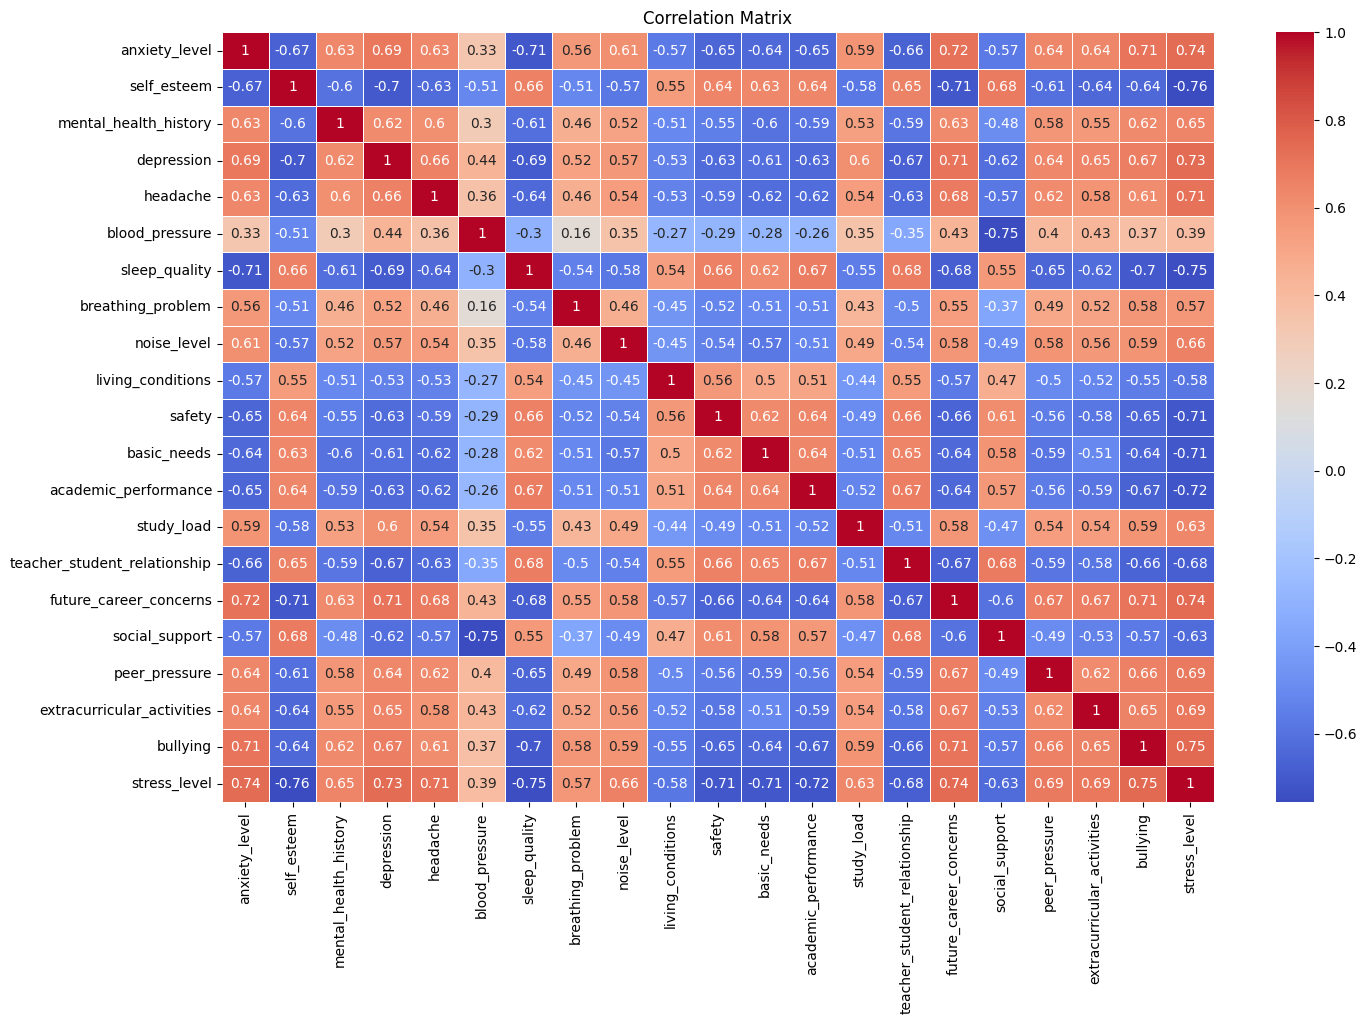

In [34]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



### 3. Grouping and Aggregation

In [35]:

# Example: Group by 'stress_level' and calculate the mean of each group
grouped_by_stress_level = data.groupby('stress_level').mean()
print("Grouped by Stress Level (Mean):\n", grouped_by_stress_level)


Grouped by Stress Level (Mean):
               anxiety_level  self_esteem  mental_health_history  depression  \
stress_level                                                                  
0                  5.431635    25.252011               0.101877    6.013405   
1                 11.430168    19.262570               0.488827   11.874302   
2                 16.401084     8.780488               0.891599   19.829268   

              headache  blood_pressure  sleep_quality  breathing_problem  \
stress_level                                                               
0             1.313673        2.195710       4.126005           1.697051   
1             2.460894        1.324022       2.530726           2.927374   
2             3.761518        3.000000       1.303523           3.653117   

              noise_level  living_conditions    safety  basic_needs  \
stress_level                                                          
0                1.648794           3.313673  4.

### 4. Extracting and Interpreting Insights

In [36]:

# Insight 1: Check mean and median of anxiety levels for different stress levels
anxiety_stats = grouped_by_stress_level['anxiety_level']
print("Anxiety Level Statistics by Stress Level:\n", anxiety_stats)
print()
# Insight 2: Correlation between anxiety level and other features
anxiety_corr = correlation_matrix['anxiety_level'].sort_values(ascending=False)
print("Correlation of Anxiety Level with Other Features:\n", anxiety_corr)
print()
# Insight 3: Distribution of stress levels
stress_distribution = data['stress_level'].value_counts()
print("Stress Level Distribution:\n", stress_distribution)

Anxiety Level Statistics by Stress Level:
 stress_level
0     5.431635
1    11.430168
2    16.401084
Name: anxiety_level, dtype: float64

Correlation of Anxiety Level with Other Features:
 anxiety_level                   1.000000
stress_level                    0.736795
future_career_concerns          0.717016
bullying                        0.709982
depression                      0.694340
peer_pressure                   0.642910
extracurricular_activities      0.641022
mental_health_history           0.634450
headache                        0.632738
noise_level                     0.608624
study_load                      0.586064
breathing_problem               0.561654
blood_pressure                  0.330867
living_conditions              -0.568434
social_support                 -0.569748
basic_needs                    -0.637079
academic_performance           -0.649601
safety                         -0.651220
teacher_student_relationship   -0.663176
self_esteem                    -

## ***Data Visualization:***

In [37]:

# Pairplot to see pairwise relationships in the dataset
sns.pairplot(data, hue='stress_level', palette='coolwarm')
plt.show()


### 1. Histogram Chart

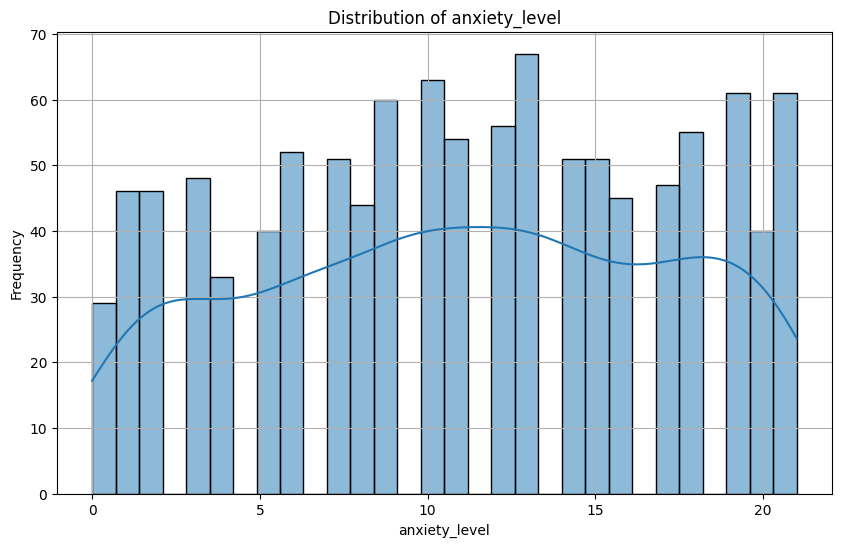

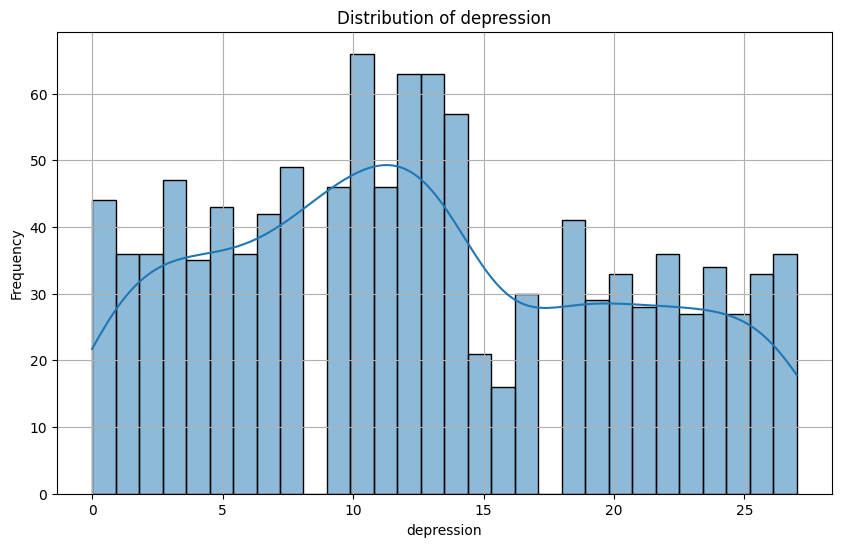

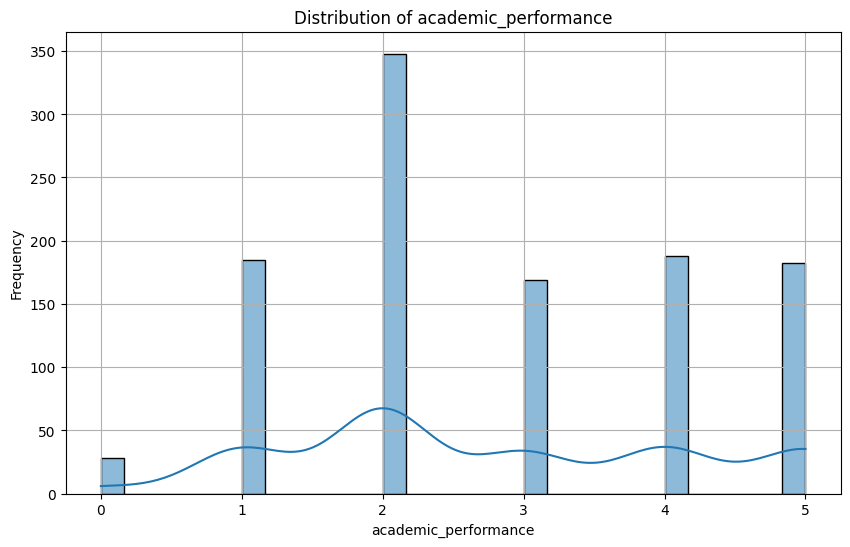

In [38]:

key_features = ['anxiety_level', 'self_esteem', 'depression', 'academic_performance']
for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


### 2. Box Plot

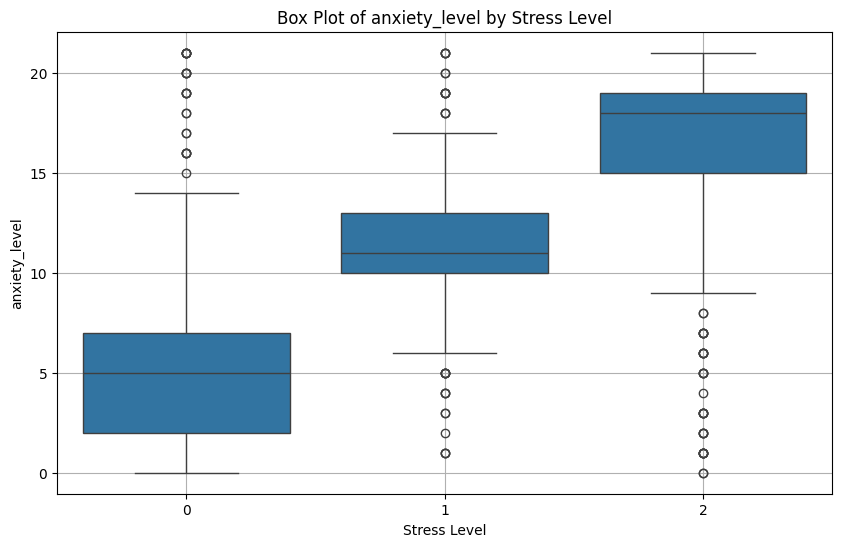

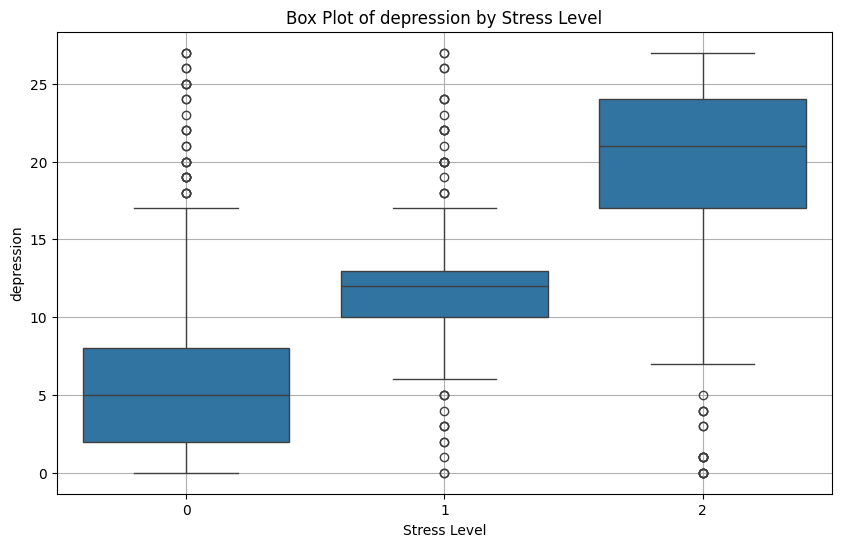

In [39]:
for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='stress_level', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Stress Level')
    plt.xlabel('Stress Level')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()


### 3. Scatter Plot

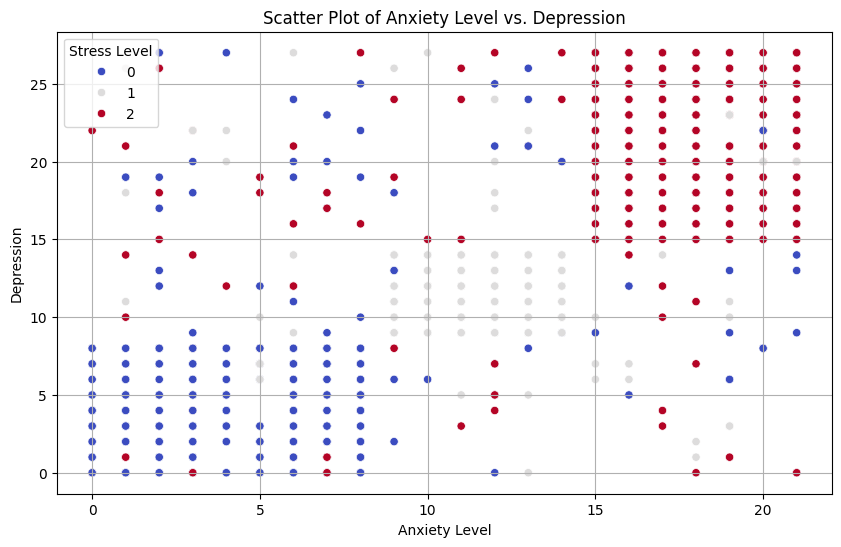

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='anxiety_level', y='depression', hue='stress_level', data=data, palette='coolwarm')
plt.title('Scatter Plot of Anxiety Level vs. Depression')
plt.xlabel('Anxiety Level')
plt.ylabel('Depression')
plt.legend(title='Stress Level')
plt.grid(True)
plt.show()


### 4. Correlation Matrix

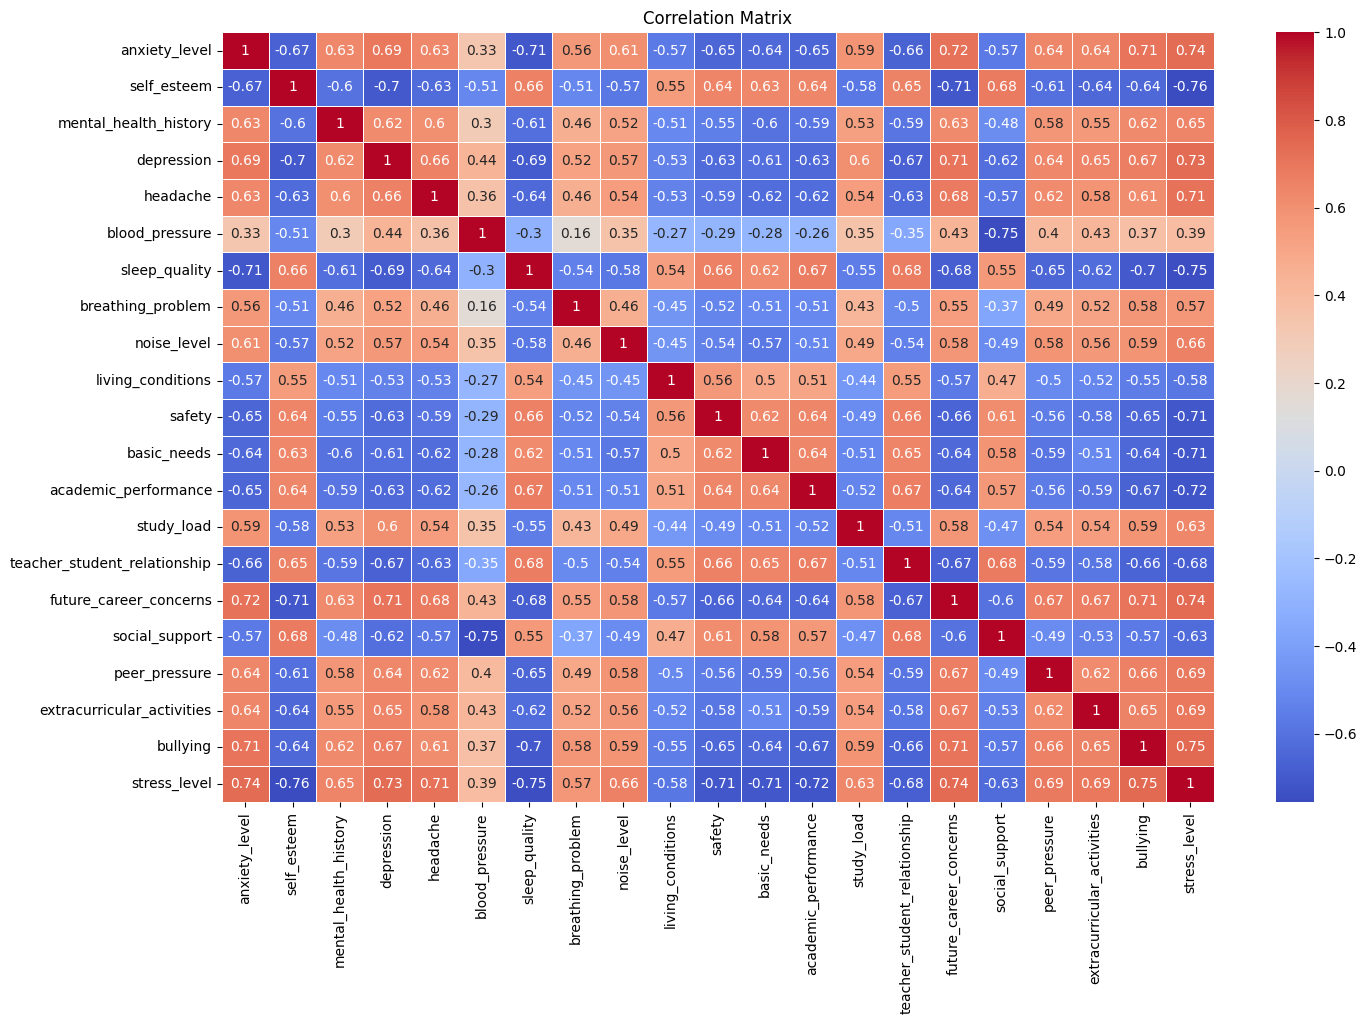

In [41]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### 5. Interactive scatter plot with Plotly

In [42]:

fig = px.scatter(data, x='anxiety_level', y='depression', color='stress_level',
                 title='Interactive Scatter Plot of Anxiety Level vs. Depression',
                 labels={'anxiety_level': 'Anxiety Level', 'depression': 'Depression'})
fig.show()

# Interactive histogram with Plotly
for feature in key_features:
    fig = px.histogram(data, x=feature, nbins=30, title=f'Interactive Distribution of {feature}')
    fig.show()


## ***Hypothesis Testing:***

## Conduct T-Test for Hypothesis 1
### Anxiety Levels Differ Significantly Between High and Low Stress Levels
a) Null Hypothesis (H0): There is no significant difference in anxiety levels between high and low stress levels.

b) Alternative Hypothesis (H1): There is a significant difference in anxiety levels between high and low stress levels.

In [43]:

# Define high and low stress levels (assuming 'stress_level' has categories like 'high', 'low')
high_stress = data[data['stress_level'] == 'high']['anxiety_level']
low_stress = data[data['stress_level'] == 'low']['anxiety_level']

# Perform t-test
t_stat, p_value = ttest_ind(high_stress, low_stress, equal_var=False)  # Welch's t-test

print("T-Test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in anxiety levels between high and low stress levels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in anxiety levels between high and low stress levels.")


T-Test Results:
T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: There is no significant difference in anxiety levels between high and low stress levels.


## Conduct Chi-Square Test for Hypothesis 2
### Self-esteem is Independent of Stress Levels
a) Null Hypothesis (H0): Self-esteem is independent of stress levels.

b) Alternative Hypothesis (H1): Self-esteem is dependent on stress levels.

In [44]:
# Create a contingency table
contingency_table = pd.crosstab(data['self_esteem'], data['stress_level'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Self-esteem is dependent on stress levels.")
else:
    print("Fail to reject the null hypothesis: Self-esteem is independent of stress levels.")



Chi-Square Test Results:
Chi-square statistic: 1412.6926219479346
P-value: 8.528022051180257e-256
Reject the null hypothesis: Self-esteem is dependent on stress levels.


## ***Advanced Analysis:***

###  Prepare the Dataset for Machine Learning

In [45]:
from sklearn.model_selection import train_test_split

# Define features and target for classification
X_classification = data.drop(columns=['stress_level'])
y_classification = data['stress_level']

# Define features and target for regression
X_regression = data.drop(columns=['anxiety_level'])
y_regression = data['anxiety_level']

# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)


#### **Apply Random Forest Classification**

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Predict on the test set
y_pred_class = rf_classifier.predict(X_test_class)

# Validate model performance
accuracy = accuracy_score(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

print("Random Forest Classification Results:")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)


Random Forest Classification Results:
Accuracy: 0.896969696969697
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       113
           1       0.92      0.92      0.92       107
           2       0.92      0.88      0.90       110

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330

Confusion Matrix:
 [[101   6   6]
 [  6  98   3]
 [ 10   3  97]]


####  **Apply Linear Regression**

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

# Predict on the test set
y_pred_reg = lin_reg.predict(X_test_reg)

# Validate model performance
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("\nLinear Regression Results:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Linear Regression Results:
Mean Squared Error: 11.706407319665413
R-squared: 0.6930851142752608
